<a href="https://colab.research.google.com/github/supanut-suntikoon/MunRiver/blob/main/MunRiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERTC - conc

K-S Test Results (p-value):
                  K-S Statistic   p-value
Temp                   0.263158  0.537929
Cond                   0.473684  0.026749
pH                     0.473684  0.026749
Flowrate               0.526316  0.009224
Dissolved_Oxygen       0.789474  0.000004
Na                     0.421053  0.068089
K                      0.368421  0.153173
Ca                     0.368421  0.153173
Mg                     0.421053  0.068089
Cl                     0.473684  0.026749
HCO3                   0.315789  0.305689
NO3                    0.263158  0.537929
SO4                    0.263158  0.537929
Si                     0.526316  0.009224
TDS                    0.526316  0.009224
Alk                    0.368421  0.153173


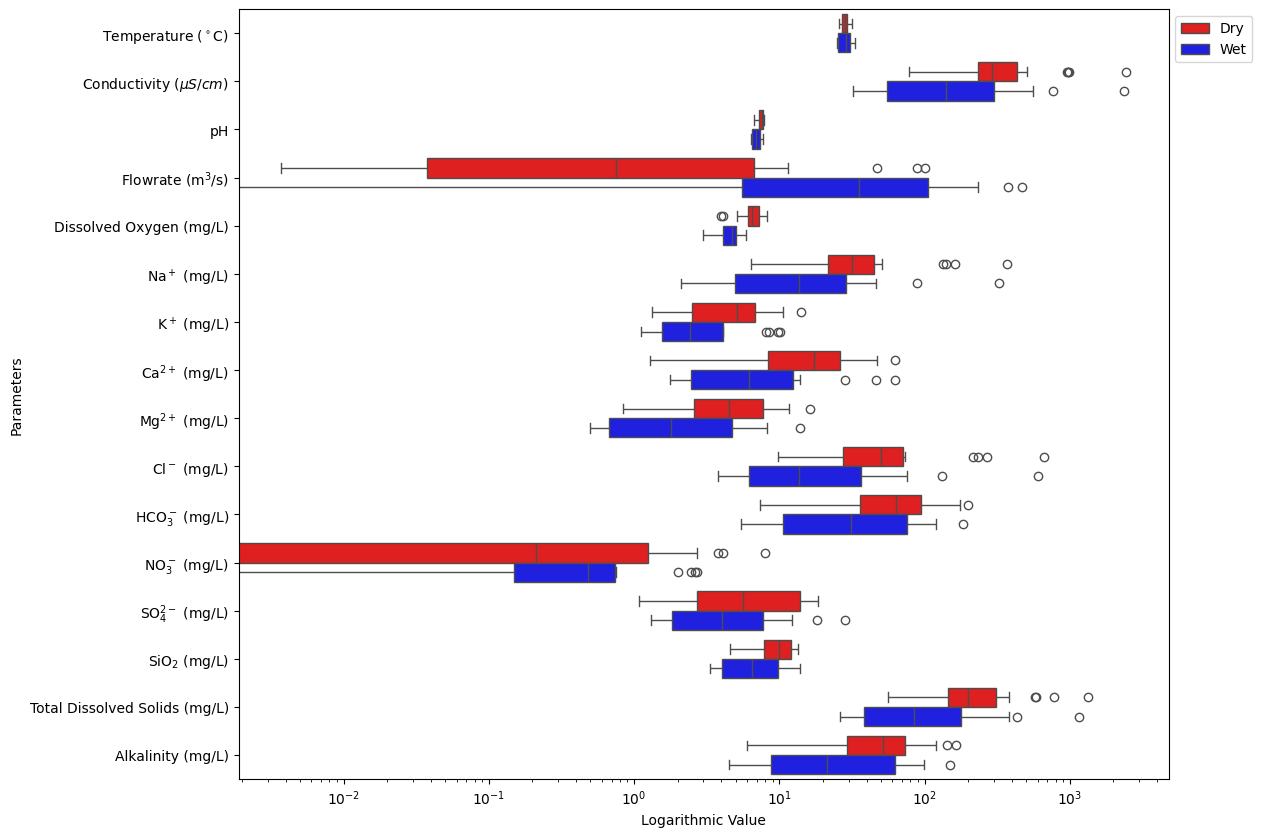

Significant parameters (p-value < 0.05): ['Cond', 'pH', 'Flowrate', 'Dissolved_Oxygen', 'Cl', 'Si', 'TDS']


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import requests
from io import StringIO

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/supanut-suntikoon/MunRiver/main/ERTC_conc.csv'

# Pull the CSV file from GitHub
response = requests.get(url)
csv_data = response.text

# Load the CSV data into a DataFrame
df = pd.read_csv(StringIO(csv_data))

# Assuming 'Seasons' column indicates 'Wet' or 'Dry'
# Automatically detect numerical columns (parameters) for K-S test
parameters = df.select_dtypes(include=[np.number]).columns.tolist()

# Initialize an empty dictionary to store K-S test results
ks_results = {}

# Perform K-S test for each parameter
for param in parameters:
    wet_data = df[df['Seasons'] == 'Wet'][param].dropna()
    dry_data = df[df['Seasons'] == 'Dry'][param].dropna()

    # Calculate K-S test
    ks_stat, p_value = ks_2samp(wet_data, dry_data)

    # Store results in dictionary
    ks_results[param] = {'K-S Statistic': ks_stat, 'p-value': p_value}

# Convert results to DataFrame for easy viewing
ks_df = pd.DataFrame(ks_results).T

# Display the p-value table
print("K-S Test Results (p-value):")
print(ks_df[ks_df['p-value'] > 0 ])

# Define LaTeX-friendly y-axis labels for publication-quality output
latex_labels = {
    'Temp': r'Temperature ($^\circ$C)',
    'Cond': r'Conductivity ($\mu S/cm$)',
    'pH': r'pH',
    'Flowrate': r'Flowrate (m$^3$/s)',
    'Dissolved_Oxygen': r'Dissolved Oxygen (mg/L)',
    'Na': r'Na$^+$ (mg/L)',
    'K': r'K$^+$ (mg/L)',
    'Ca': r'Ca$^{2+}$ (mg/L)',
    'Mg': r'Mg$^{2+}$ (mg/L)',
    'Cl': r'Cl$^-$ (mg/L)',
    'HCO3': r'HCO$_3^-$ (mg/L)',
    'NO3': r'NO$_3^-$ (mg/L)',
    'SO4': r'SO$_4^{2-}$ (mg/L)',
    'Si': r'SiO$_2$ (mg/L)',
    'TDS': r'Total Dissolved Solids (mg/L)',
    'Alk': r'Alkalinity (mg/L)'  # Replaced 'ALK' by 'Alk' to match available column name
}

# Reorder the parameters according to the specified order
ordered_parameters = ['Temp', 'Cond', 'pH', 'Flowrate', 'Dissolved_Oxygen', 'Na', 'K', 'Ca', 'Mg', 'Cl', 'HCO3', 'NO3', 'SO4', 'Si', 'TDS', 'Alk']

# Filter latex_labels based on the actual columns present in the dataset and the specified order
filtered_latex_labels = {k: v for k, v in latex_labels.items() if k in df.columns}

# Melt the dataframe for the selected columns and Seasons
df_melted = df.melt(id_vars=['Seasons'], value_vars=ordered_parameters)
df_melted['variable'] = df_melted['variable'].map(filtered_latex_labels)

# Create a horizontal box plot classified by 'Seasons' for selected parameters on a log scale with specified colors
plt.figure(figsize=(12, 10))

# Define the color palette with red and blue colors at 40% opacity
palette = {'Dry': (1, 0, 0, 0.2),  # Red with 40% opacity
           'Wet': (0, 0, 1, 0.2)}  # Blue with 40% opacity

# Create the box plot grouped by 'Seasons' with the specified colors and log scale
sns.boxplot(data=df_melted, x='value', y='variable', hue='Seasons', orient='h', palette=palette)

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Add labels and title
plt.xlabel('Logarithmic Value')
plt.ylabel('Parameters')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure as a high-resolution .png file with 300 dpi
plt.savefig("seasonal_boxplot_journal_style_combined.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

# Highlight statistically significant parameters on the plot
# Use the p-value threshold to filter parameters with significance (e.g., p-value < 0.05)
significant_params = ks_df[ks_df['p-value'] < 0.05].index.tolist()

print(f"Significant parameters (p-value < 0.05): {significant_params}")
